<a href="https://colab.research.google.com/github/Meenu-Lakshmi/SolarPower-Predictor/blob/main/Copy_of_Untitled5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Load and Explore the Data

In [2]:
import pandas as pd
df = pd.read_csv('spg.csv')

# Display basic information about the dataset
df.info()

# Display first few rows
print(df.head())

# Check for missing values
print("\nMissing Values Count:")
print(df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4213 entries, 0 to 4212
Data columns (total 21 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   temperature_2_m_above_gnd          4213 non-null   float64
 1   relative_humidity_2_m_above_gnd    4213 non-null   int64  
 2   mean_sea_level_pressure_MSL        4213 non-null   float64
 3   total_precipitation_sfc            4213 non-null   float64
 4   snowfall_amount_sfc                4213 non-null   float64
 5   total_cloud_cover_sfc              4213 non-null   float64
 6   high_cloud_cover_high_cld_lay      4213 non-null   int64  
 7   medium_cloud_cover_mid_cld_lay     4213 non-null   int64  
 8   low_cloud_cover_low_cld_lay        4213 non-null   int64  
 9   shortwave_radiation_backwards_sfc  4213 non-null   float64
 10  wind_speed_10_m_above_gnd          4213 non-null   float64
 11  wind_direction_10_m_above_gnd      4213 non-null   float

# 2. Analyze Relationship with Target Variable

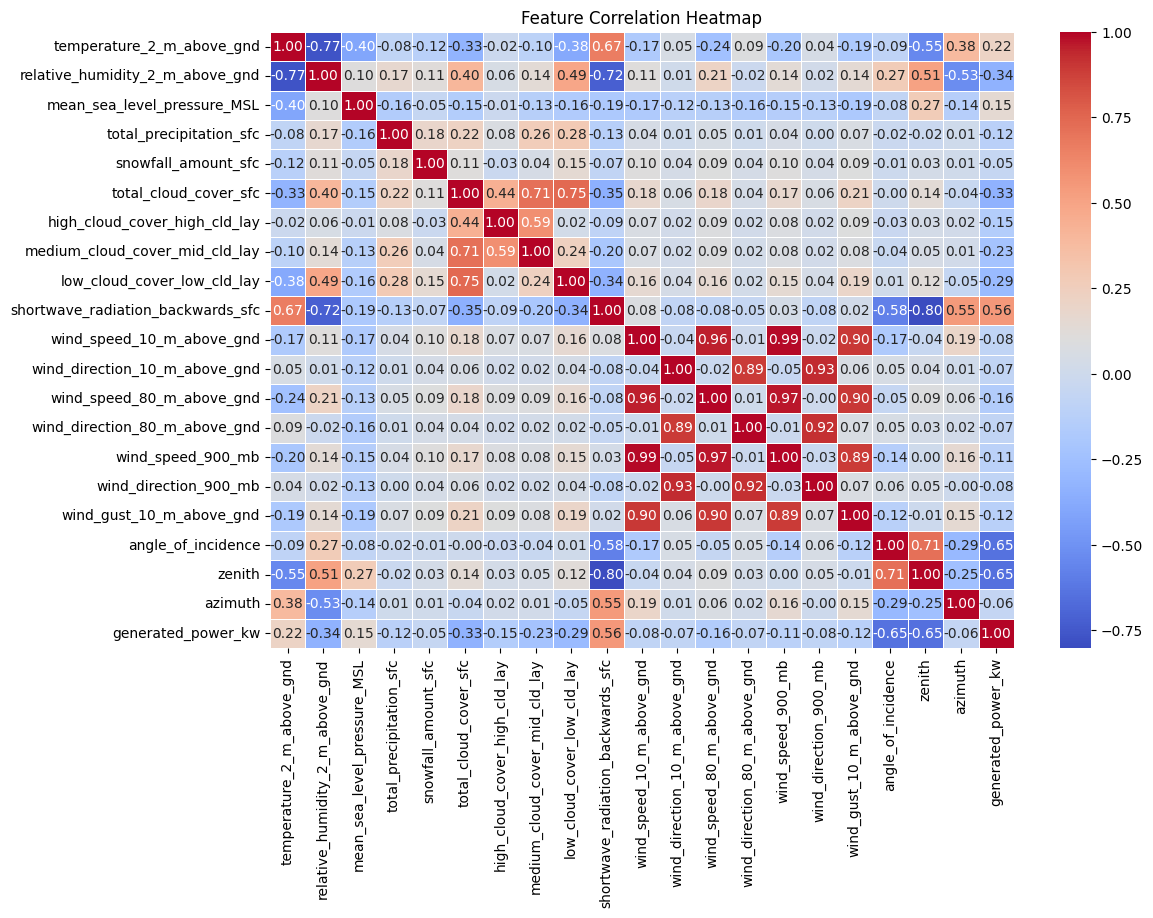


Correlation with Target Variable:
generated_power_kw                   1.000000
shortwave_radiation_backwards_sfc    0.556148
temperature_2_m_above_gnd            0.217280
mean_sea_level_pressure_MSL          0.150551
snowfall_amount_sfc                 -0.049508
azimuth                             -0.061184
wind_direction_80_m_above_gnd       -0.069941
wind_direction_10_m_above_gnd       -0.073257
wind_direction_900_mb               -0.077435
wind_speed_10_m_above_gnd           -0.083043
wind_speed_900_mb                   -0.107615
total_precipitation_sfc             -0.118442
wind_gust_10_m_above_gnd            -0.122808
high_cloud_cover_high_cld_lay       -0.147723
wind_speed_80_m_above_gnd           -0.157899
medium_cloud_cover_mid_cld_lay      -0.227834
low_cloud_cover_low_cld_lay         -0.288066
total_cloud_cover_sfc               -0.334338
relative_humidity_2_m_above_gnd     -0.336783
angle_of_incidence                  -0.646537
zenith                              -0.649991

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix
corr_matrix = df.corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

# Display correlation with target variable
corr_with_target = corr_matrix["generated_power_kw"].sort_values(ascending=False)
print("\nCorrelation with Target Variable:")
print(corr_with_target)


# 3. Feature Contribution to Target Variable

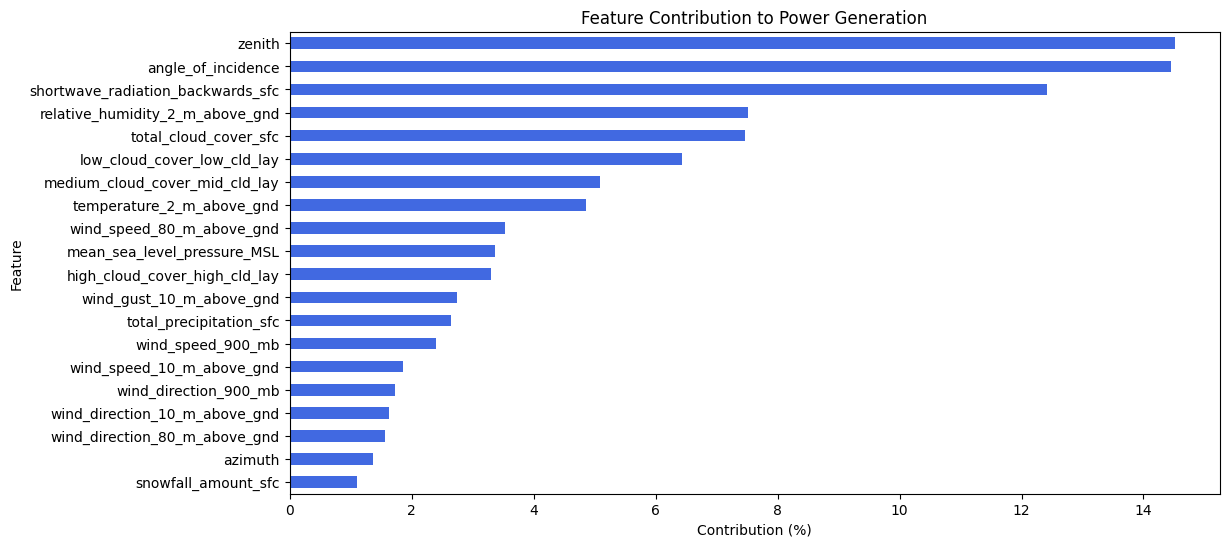


Feature Contribution to Target Variable (%):
shortwave_radiation_backwards_sfc    12.424048
temperature_2_m_above_gnd             4.853912
mean_sea_level_pressure_MSL           3.363233
snowfall_amount_sfc                   1.105985
azimuth                               1.366815
wind_direction_80_m_above_gnd         1.562446
wind_direction_10_m_above_gnd         1.636515
wind_direction_900_mb                 1.729866
wind_speed_10_m_above_gnd             1.855145
wind_speed_900_mb                     2.404068
total_precipitation_sfc               2.645926
wind_gust_10_m_above_gnd              2.743460
high_cloud_cover_high_cld_lay         3.300051
wind_speed_80_m_above_gnd             3.527370
medium_cloud_cover_mid_cld_lay        5.089687
low_cloud_cover_low_cld_lay           6.435246
total_cloud_cover_sfc                 7.468939
relative_humidity_2_m_above_gnd       7.523550
angle_of_incidence                   14.443290
zenith                               14.520448
Name: generate

In [4]:
# Calculate feature importance using correlation absolute values
feature_contributions = corr_with_target.abs().drop("generated_power_kw")
feature_contributions = (feature_contributions / feature_contributions.sum()) * 100

# Plot feature contribution
plt.figure(figsize=(12, 6))
feature_contributions.sort_values().plot(kind='barh', color='royalblue')
plt.xlabel("Contribution (%)")
plt.ylabel("Feature")
plt.title("Feature Contribution to Power Generation")
plt.show()

# Display contribution percentages
print("\nFeature Contribution to Target Variable (%):")
print(feature_contributions)


# 5. Plot Feature Distributions Before Preprocessing

<ipython-input-9-80dfee02abcc>:5: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df.drop(columns=["generated_power_kw"]).hist(bins=30, figsize=(12, 10), ax=axes[0])


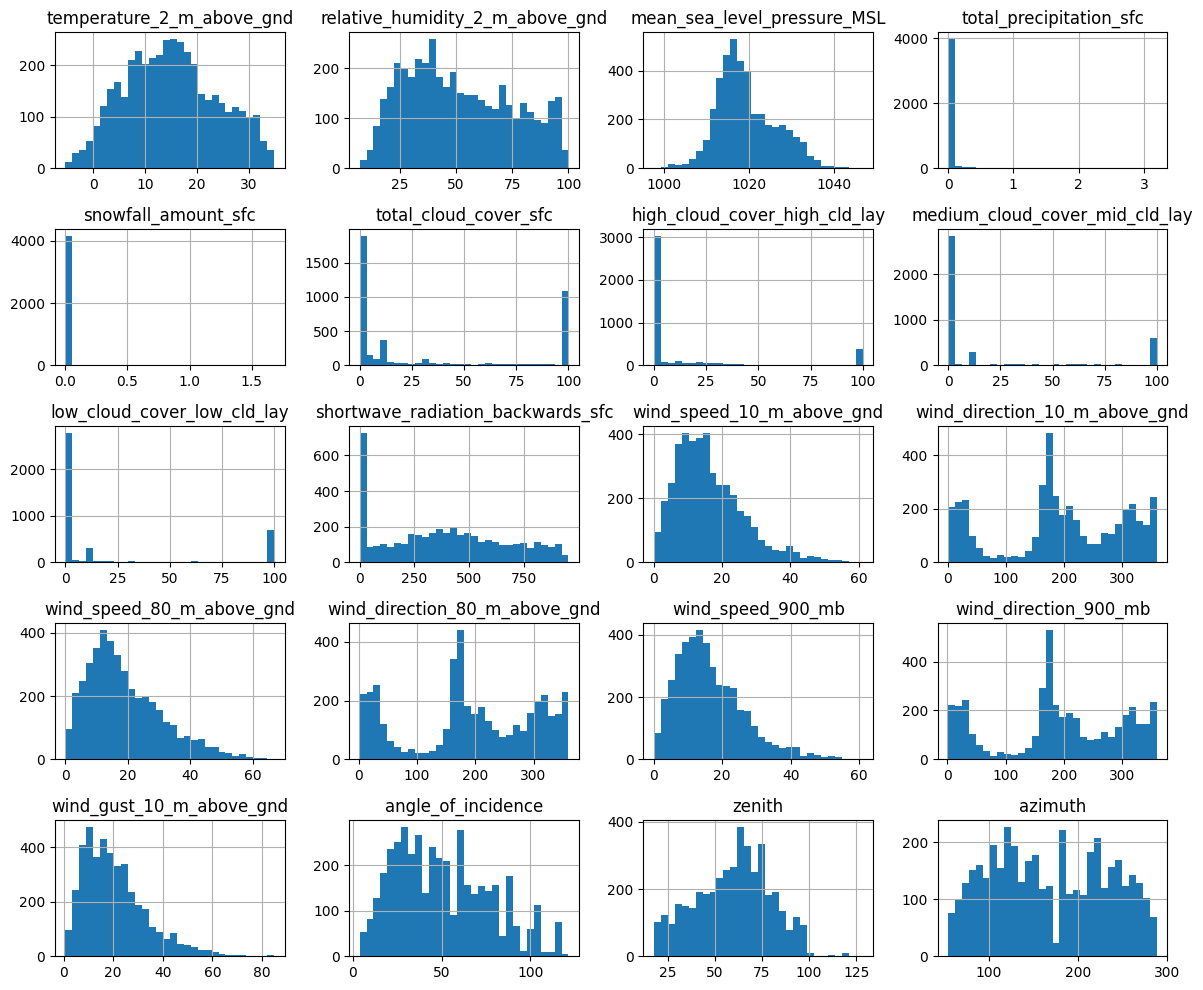

In [9]:
# Plot histograms of features before and after preprocessing
fig, axes = plt.subplots(2, 1, figsize=(12, 10))

# Before preprocessing
df.drop(columns=["generated_power_kw"]).hist(bins=30, figsize=(12, 10), ax=axes[0])
axes[0].set_title("Feature Distributions Before Preprocessing")



plt.tight_layout()
plt.show()


# 4. Handle Outliers

<ipython-input-6-ac366206e48e>:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=outlier_df, x="Feature", y="Outlier Count", palette="viridis")


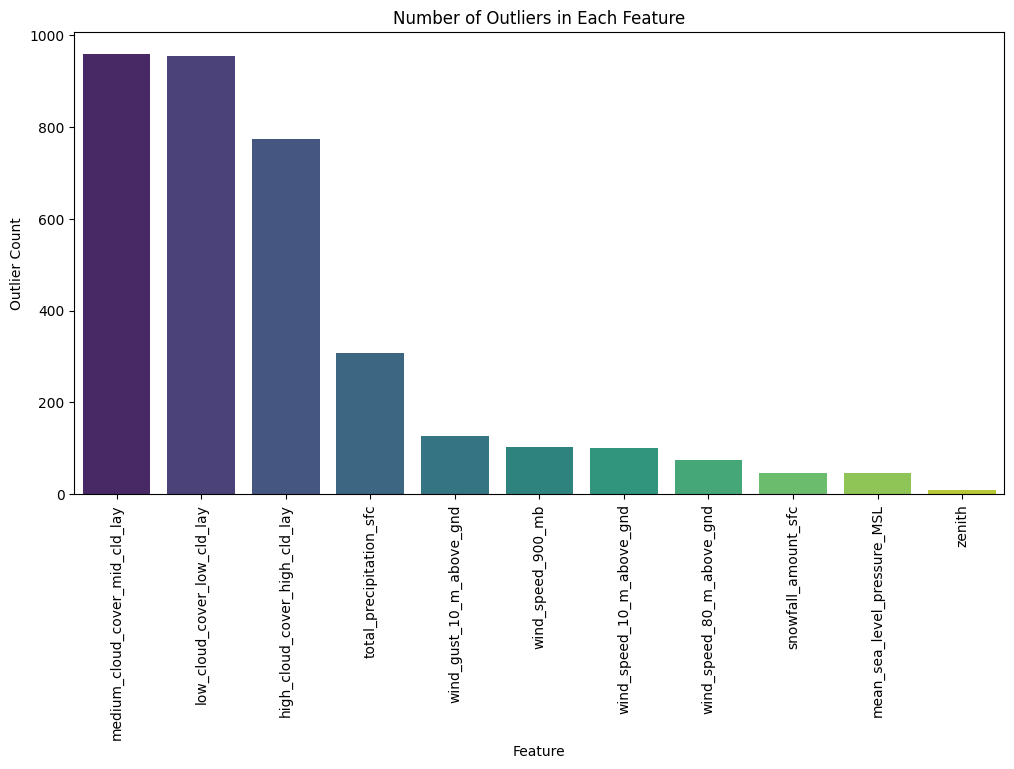

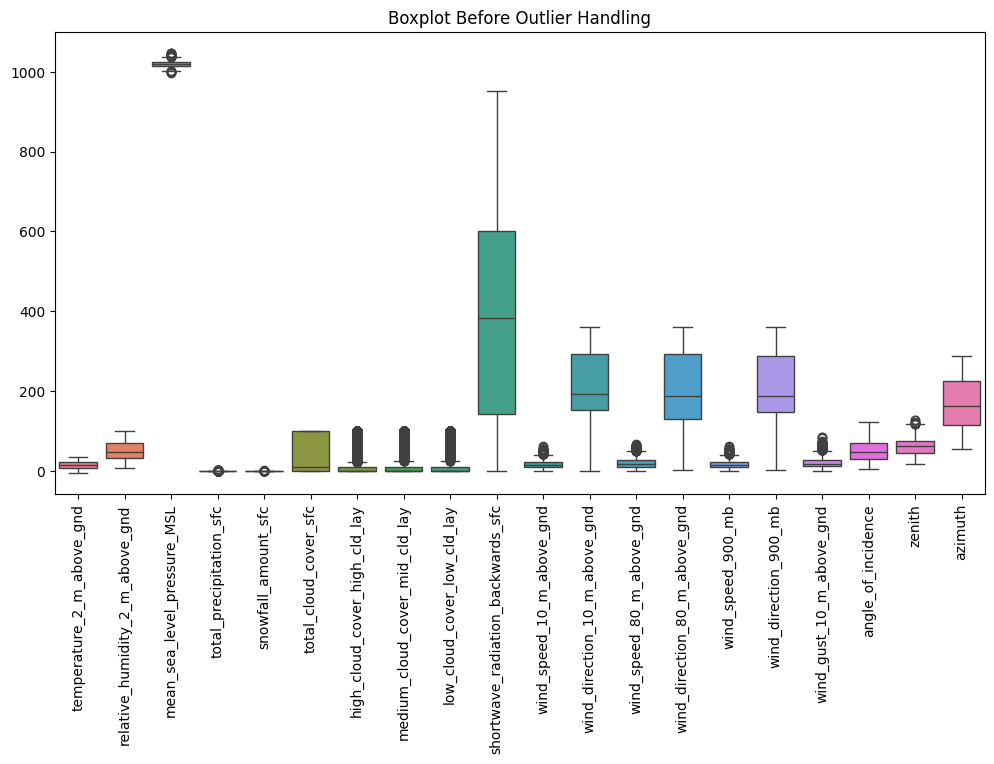

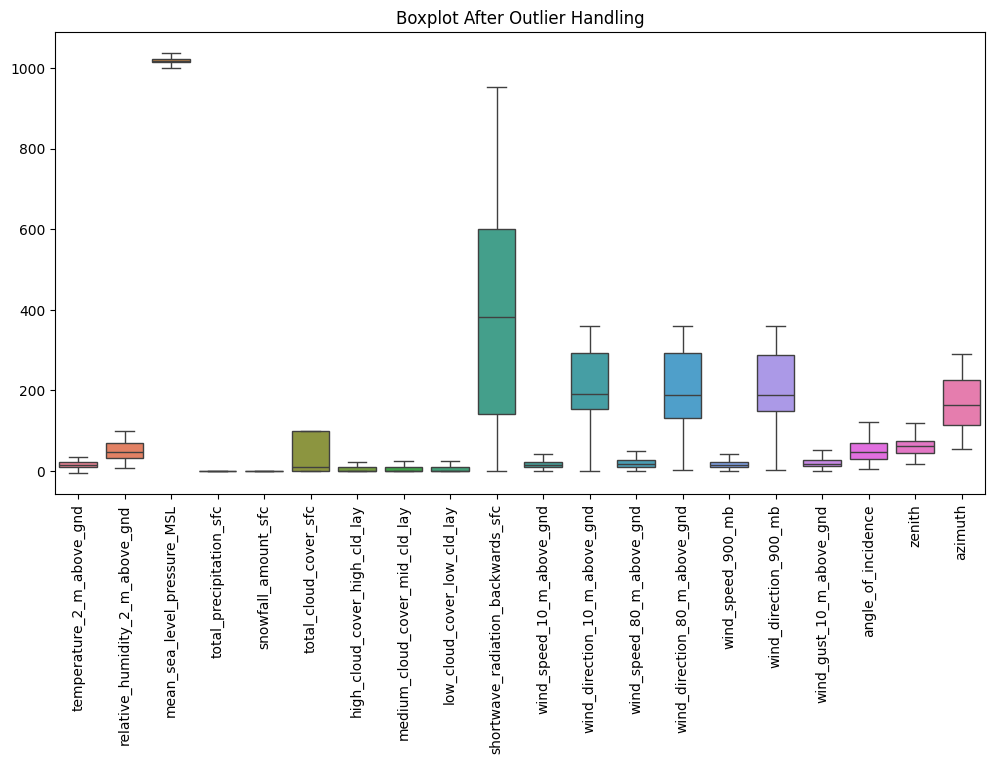

,Feature,Outlier Count
4,medium_cloud_cover_mid_cld_lay,959
5,low_cloud_cover_low_cld_lay,955
3,high_cloud_cover_high_cld_lay,773
1,total_precipitation_sfc,307
9,wind_gust_10_m_above_gnd,127
8,wind_speed_900_mb,103
6,wind_speed_10_m_above_gnd,101
7,wind_speed_80_m_above_gnd,74
2,snowfall_amount_sfc,47
0,mean_sea_level_pressure_MSL,45


In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# List of numerical features (excluding target variable)
num_features = df.columns[:-1]

# Identify outliers and count them for each feature
outlier_counts = {}

for col in num_features:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Count number of outliers
    num_outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)].shape[0]
    if num_outliers > 0:
        outlier_counts[col] = num_outliers

# Convert outlier counts to DataFrame
outlier_df = pd.DataFrame(list(outlier_counts.items()), columns=["Feature", "Outlier Count"])
outlier_df = outlier_df.sort_values(by="Outlier Count", ascending=False)

# Plot bar chart of outlier counts
plt.figure(figsize=(12, 6))
sns.barplot(data=outlier_df, x="Feature", y="Outlier Count", palette="viridis")
plt.xticks(rotation=90)
plt.title("Number of Outliers in Each Feature")
plt.xlabel("Feature")
plt.ylabel("Outlier Count")
plt.show()

# Plot boxplot before handling outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[num_features])
plt.xticks(rotation=90)
plt.title("Boxplot Before Outlier Handling")
plt.show()

# Function to remove outliers using IQR method
def remove_outliers(df, columns):
    df_cleaned = df.copy()
    for col in columns:
        Q1 = df_cleaned[col].quantile(0.25)
        Q3 = df_cleaned[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Cap the outliers instead of removing them
        df_cleaned[col] = np.where(df_cleaned[col] < lower_bound, lower_bound, df_cleaned[col])
        df_cleaned[col] = np.where(df_cleaned[col] > upper_bound, upper_bound, df_cleaned[col])

    return df_cleaned

# Apply outlier removal
df_cleaned = remove_outliers(df, num_features)

# Plot boxplot after handling outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_cleaned[num_features])
plt.xticks(rotation=90)
plt.title("Boxplot After Outlier Handling")
plt.show()

# Display the features with the most outliers
outlier_df


# Min max scaling

<ipython-input-7-19ed8f83fa2d>:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=90)
<ipython-input-7-19ed8f83fa2d>:29: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=90)


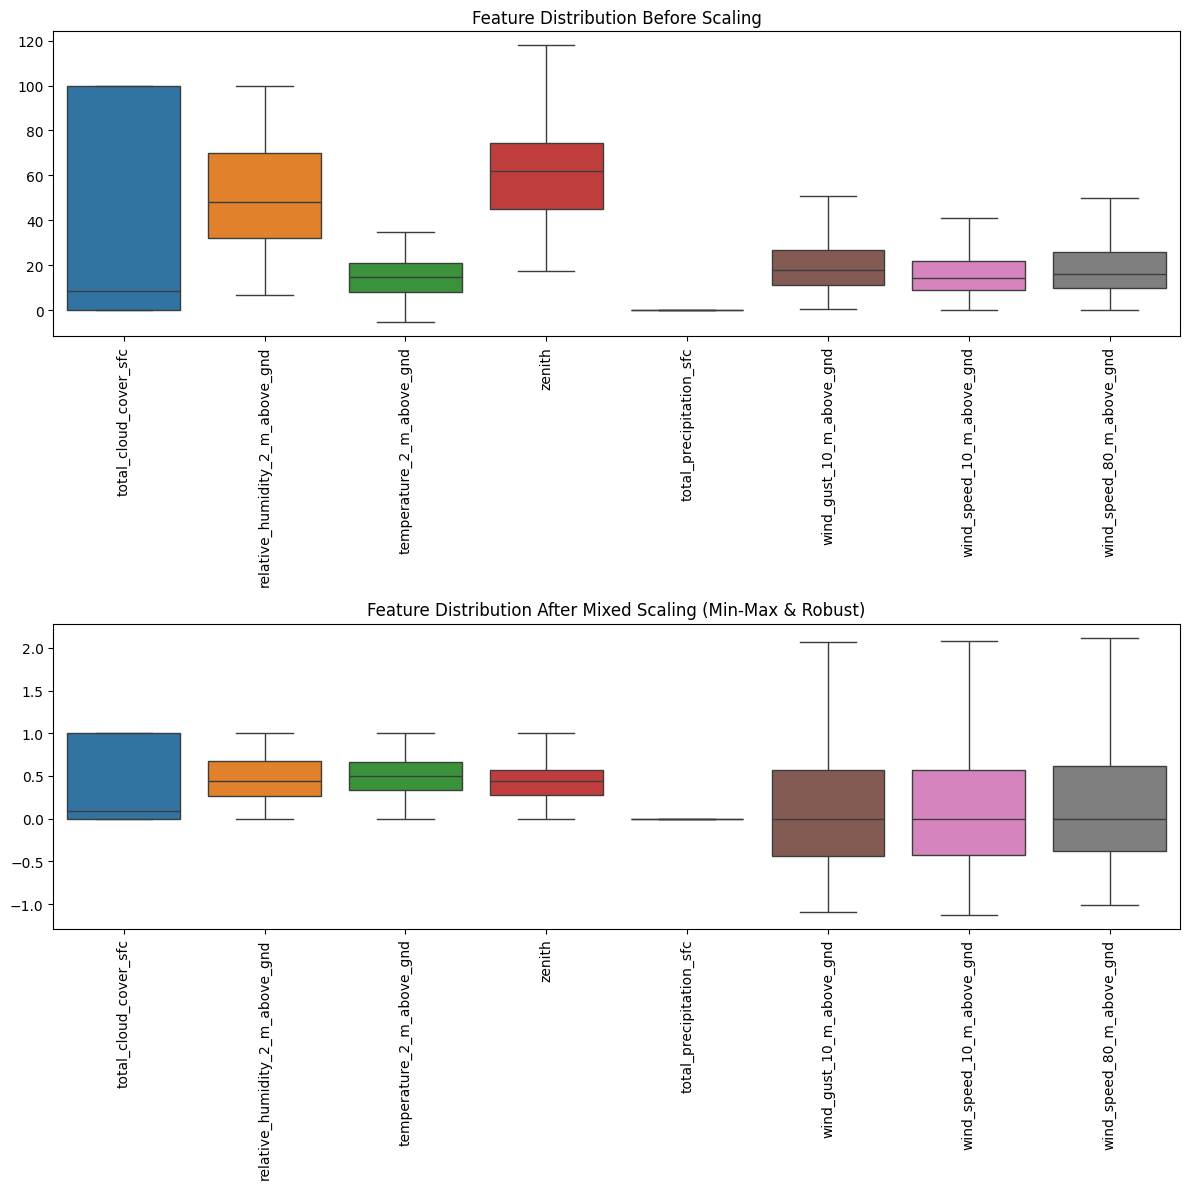

In [7]:
from sklearn.preprocessing import MinMaxScaler, RobustScaler

df_scaled = df_cleaned.copy()

# Min-Max Scaling: For features with fixed bounded ranges
min_max_features = ["total_cloud_cover_sfc", "relative_humidity_2_m_above_gnd", "temperature_2_m_above_gnd", "zenith"]
min_max_scaler = MinMaxScaler()
df_scaled[min_max_features] = min_max_scaler.fit_transform(df_scaled[min_max_features])

# Robust Scaling: For features with outliers
robust_features = ["total_precipitation_sfc", "wind_gust_10_m_above_gnd", "wind_speed_10_m_above_gnd", "wind_speed_80_m_above_gnd"]
robust_scaler = RobustScaler()
df_scaled[robust_features] = robust_scaler.fit_transform(df_scaled[robust_features])

# Visualizing the distributions before and after scaling
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(2, 1, figsize=(12, 12))

# Boxplot before Scaling
sns.boxplot(data=df_cleaned[min_max_features + robust_features], ax=axes[0])
axes[0].set_title("Feature Distribution Before Scaling")
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=90)

# Boxplot after Scaling
sns.boxplot(data=df_scaled[min_max_features + robust_features], ax=axes[1])
axes[1].set_title("Feature Distribution After Mixed Scaling (Min-Max & Robust)")
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=90)

plt.tight_layout()
plt.show()


# After data preprocessing

<Figure size 1200x600 with 0 Axes>

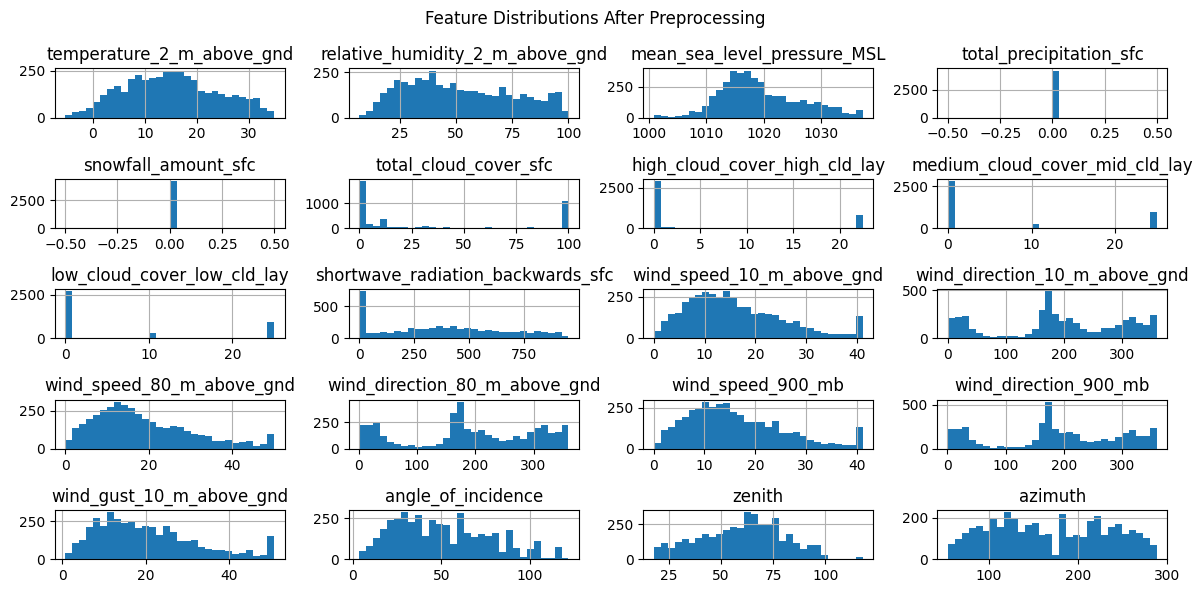

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure for the histograms after preprocessing
plt.figure(figsize=(12, 6))
df_cleaned.drop(columns=["generated_power_kw"]).hist(bins=30, figsize=(12, 6))
plt.suptitle("Feature Distributions After Preprocessing")
plt.tight_layout()
plt.show()


#  Split Data

In [11]:
from sklearn.model_selection import train_test_split

# Define features (X) and target variable (y)
X = df_scaled.drop(columns=["generated_power_kw"])  # Features
y = df_scaled["generated_power_kw"]  # Target Variable

# Split the dataset (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display dataset shapes
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)


Training set shape: (3370, 20) (3370,)
Testing set shape: (843, 20) (843,)


# Train XGBoost Model

In [12]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Initialize XGBoost Regressor
xgb_model = xgb.XGBRegressor(objective="reg:squarederror", random_state=42, n_estimators=100)

# Train the model
xgb_model.fit(X_train, y_train)

# Predict on test data
y_pred = xgb_model.predict(X_test)

rmse = mean_squared_error(y_test, y_pred) ** 0.5
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse}")
print(f"R² Score: {r2}")

RMSE: 419.5036881043082
R² Score: 0.8073450193512685


In [13]:
y_train_pred = xgb_model.predict(X_train)
y_test_pred = xgb_model.predict(X_test)

# Compute RMSE for training and test sets
train_rmse = mean_squared_error(y_train, y_train_pred) ** 0.5
test_rmse = mean_squared_error(y_test, y_test_pred) ** 0.5

# Compute R² Score for training and test sets
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Print results
print(f"Training RMSE: {train_rmse}")
print(f"Test RMSE: {test_rmse}")
print(f"Training R² Score: {train_r2}")
print(f"Test R² Score: {test_r2}")

Training RMSE: 76.03393754366576
Test RMSE: 419.5036881043082
Training R² Score: 0.9933629524556136
Test R² Score: 0.8073450193512685


# Random Forest Regression Model

Random Forest Model Performance:
Training RMSE: 252.13
Test RMSE: 410.72
Training R² Score: 0.9270
Test R² Score: 0.8153


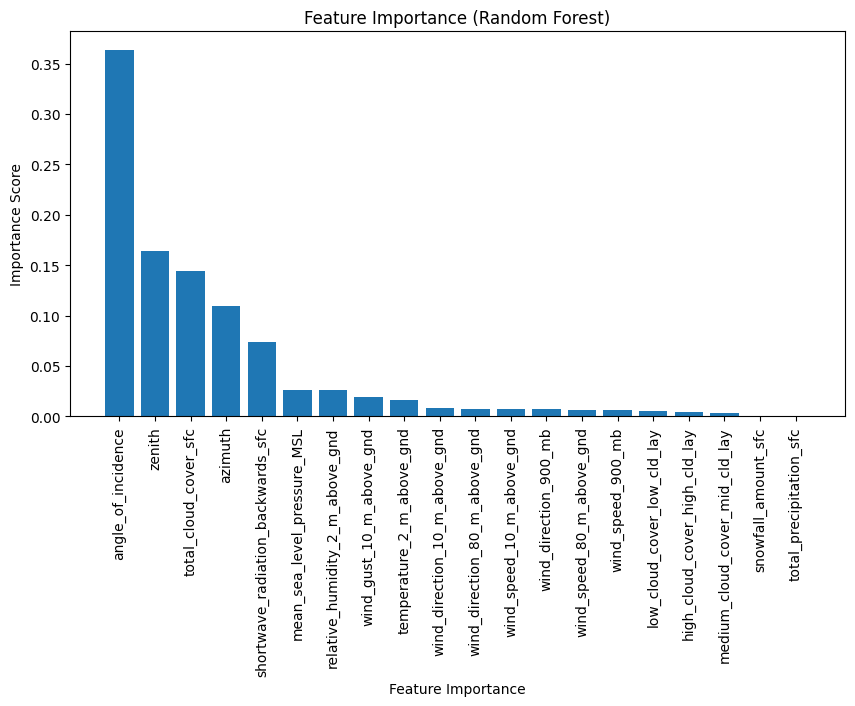

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initialize Random Forest Regressor with optimized parameters
rf_model = RandomForestRegressor(
    n_estimators=200,   # More trees for better learning
    max_depth=10,       # Prevents overfitting
    min_samples_split=4,  # Minimum samples required to split
    min_samples_leaf=2,   # Minimum samples per leaf
    random_state=42,    # Ensures reproducibility
    n_jobs=-1           # Uses all CPU cores for faster training
)

# Train the model
rf_model.fit(X_train, y_train)

# Predictions
y_train_pred = rf_model.predict(X_train)
y_test_pred = rf_model.predict(X_test)

# Evaluate the model
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

train_rmse = np.sqrt(train_mse)  # RMSE
test_rmse = np.sqrt(test_mse)  # RMSE

train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Print results
print("Random Forest Model Performance:")
print(f"Training RMSE: {train_rmse:.2f}")
print(f"Test RMSE: {test_rmse:.2f}")
print(f"Training R² Score: {train_r2:.4f}")
print(f"Test R² Score: {test_r2:.4f}")

# Feature Importance Plot
plt.figure(figsize=(10, 5))
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), np.array(X_train.columns)[indices], rotation=90)
plt.xlabel("Feature Importance")
plt.ylabel("Importance Score")
plt.title("Feature Importance (Random Forest)")
plt.show()


# Decision Tree Regression Model

Decision Tree Model Performance:
Training RMSE: 261.91
Test RMSE: 503.25
Training R² Score: 0.9212
Test R² Score: 0.7227


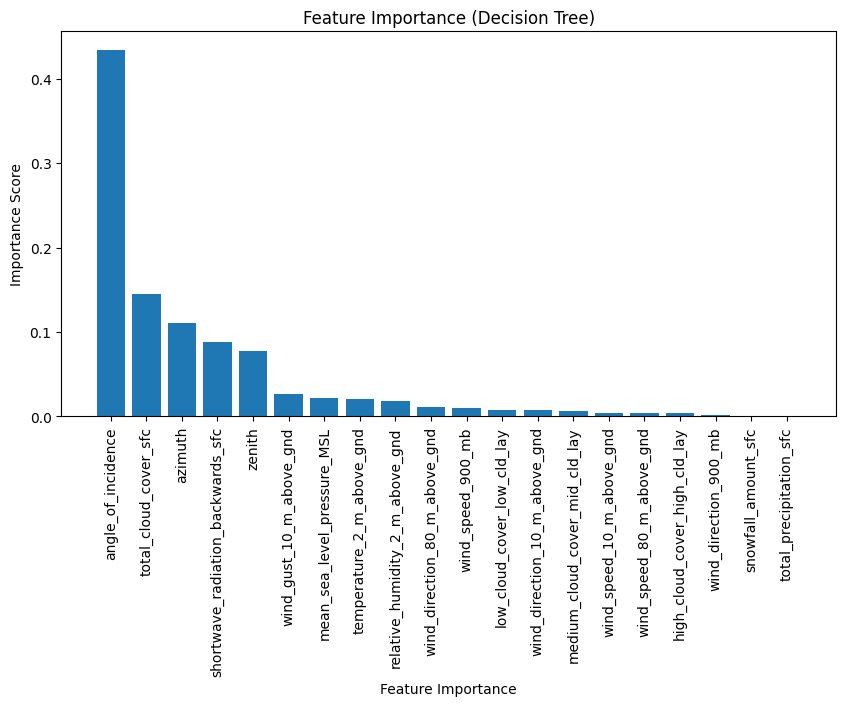

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initialize Decision Tree Regressor with optimized parameters
dt_model = DecisionTreeRegressor(
    max_depth=10,         # Limits tree depth to prevent overfitting
    min_samples_split=4,  # Minimum samples required to split an internal node
    min_samples_leaf=2,   # Minimum samples per leaf node
    random_state=42       # Ensures reproducibility
)

# Train the model
dt_model.fit(X_train, y_train)

# Predictions
y_train_pred = dt_model.predict(X_train)
y_test_pred = dt_model.predict(X_test)

# Evaluate the model
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

train_rmse = np.sqrt(train_mse)  # RMSE
test_rmse = np.sqrt(test_mse)  # RMSE

train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Print results
print("Decision Tree Model Performance:")
print(f"Training RMSE: {train_rmse:.2f}")
print(f"Test RMSE: {test_rmse:.2f}")
print(f"Training R² Score: {train_r2:.4f}")
print(f"Test R² Score: {test_r2:.4f}")

# Feature Importance Plot
plt.figure(figsize=(10, 5))
importances = dt_model.feature_importances_
indices = np.argsort(importances)[::-1]
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), np.array(X_train.columns)[indices], rotation=90)
plt.xlabel("Feature Importance")
plt.ylabel("Importance Score")
plt.title("Feature Importance (Decision Tree)")
plt.show()


#  Polynomial Regression Model


Polynomial Regression Model Performance:
Training RMSE: 422.47
Test RMSE: 451.13
Training R² Score: 0.7951
Test R² Score: 0.7772


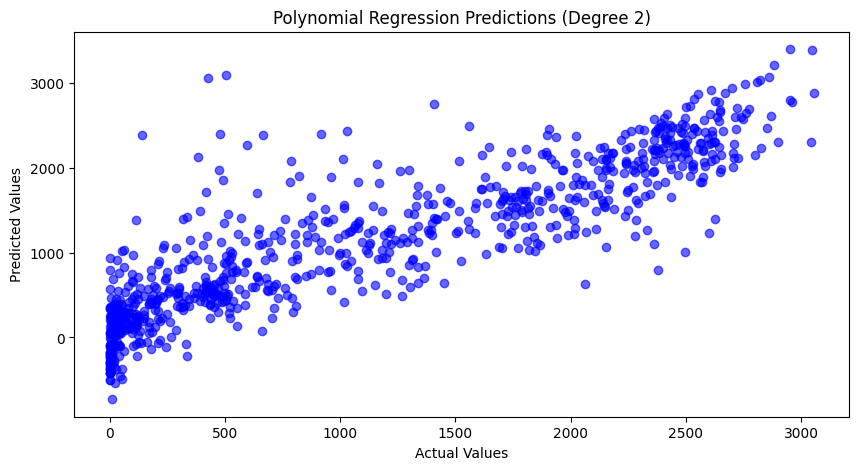

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import make_pipeline

# Set polynomial degree (Higher degrees may overfit)
degree = 2

# Create a pipeline with Polynomial Features and Linear Regression
poly_model = make_pipeline(PolynomialFeatures(degree), LinearRegression())

# Train the model
poly_model.fit(X_train, y_train)

# Predictions
y_train_pred = poly_model.predict(X_train)
y_test_pred = poly_model.predict(X_test)

# Evaluate the model
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

train_rmse = np.sqrt(train_mse)  # RMSE
test_rmse = np.sqrt(test_mse)  # RMSE

train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Print results
print("Polynomial Regression Model Performance:")
print(f"Training RMSE: {train_rmse:.2f}")
print(f"Test RMSE: {test_rmse:.2f}")
print(f"Training R² Score: {train_r2:.4f}")
print(f"Test R² Score: {test_r2:.4f}")

# Plotting the residuals
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_test_pred, alpha=0.6, color="blue")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title(f"Polynomial Regression Predictions (Degree {degree})")
plt.show()


# Linear Regression

🔹 Linear Regression Model Performance:
Train RMSE: 508.6379
Test RMSE: 507.5323
Train R² Score: 0.7030
Test R² Score: 0.7180


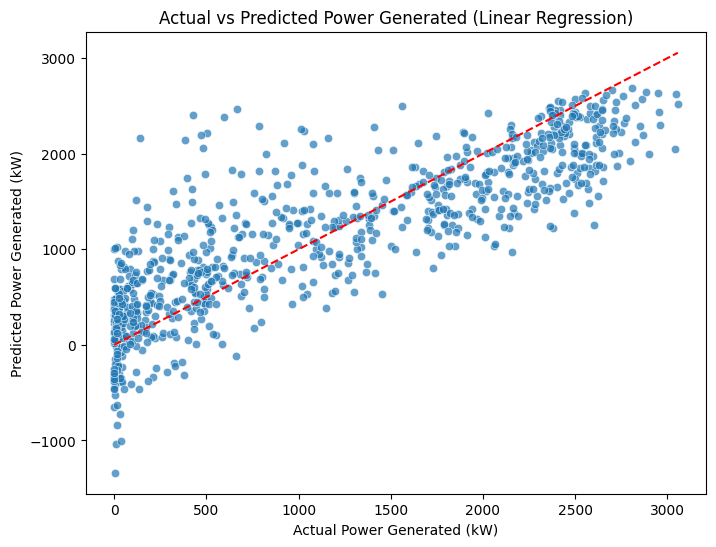

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset (assuming df is already preprocessed)
# df = pd.read_csv("your_data.csv")  # Uncomment if you need to load data

# Define features and target variable
X = df.drop(columns=["generated_power_kw"])  # Independent variables
y = df["generated_power_kw"]  # Target variable

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Linear Regression model
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# Predictions
y_train_pred = lin_reg.predict(X_train)
y_test_pred = lin_reg.predict(X_test)

# Model Evaluation
train_mse = mean_squared_error(y_train, y_train_pred)  # Mean Squared Error
test_mse = mean_squared_error(y_test, y_test_pred)

# Compute RMSE manually
train_rmse = np.sqrt(train_mse)
test_rmse = np.sqrt(test_mse)

train_r2 = r2_score(y_train, y_train_pred)  # R² Score for training set
test_r2 = r2_score(y_test, y_test_pred)  # R² Score for test set

# Display model performance
print("🔹 Linear Regression Model Performance:")
print(f"Train RMSE: {train_rmse:.4f}")
print(f"Test RMSE: {test_rmse:.4f}")
print(f"Train R² Score: {train_r2:.4f}")
print(f"Test R² Score: {test_r2:.4f}")

# Plot actual vs predicted values for test set
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_test_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Perfect Fit Line
plt.xlabel("Actual Power Generated (kW)")
plt.ylabel("Predicted Power Generated (kW)")
plt.title("Actual vs Predicted Power Generated (Linear Regression)")
plt.show()


# Final Optimized Code for XGBoost Regression(reduce overfitting)

📌 Model Optimization Results:
✅ Training RMSE: 266.61
✅ Test RMSE: 399.45
✅ Training R² Score: 0.9184
✅ Test R² Score: 0.8253

📊 Cross-Validation R² Scores: [0.75825165 0.80609566 0.78786483 0.8178404  0.80209486]
📊 Mean Cross-Validation R² Score: 0.7944


<Figure size 1000x500 with 0 Axes>

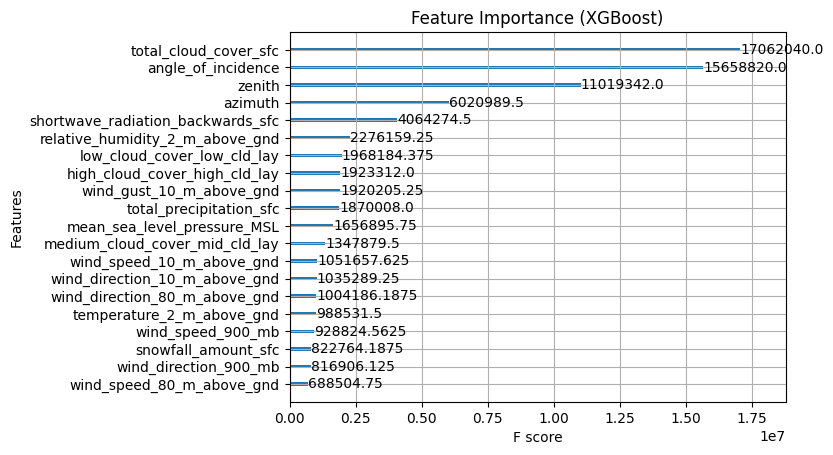

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, r2_score

# Initialize XGBoost model with optimized hyperparameters
xgb_model = xgb.XGBRegressor(
    objective="reg:squarederror",
    random_state=42,
    n_estimators=200,  # More estimators for better learning
    max_depth=5,  # Prevents overfitting
    min_child_weight=3,  # Avoids small splits
    reg_alpha=0.1,  # L1 Regularization
    reg_lambda=1.0,  # L2 Regularization
    learning_rate=0.05  # Adjust step size
)

# Train the model
xgb_model.fit(X_train, y_train)

# Predictions
y_train_pred = xgb_model.predict(X_train)
y_test_pred = xgb_model.predict(X_test)

# Evaluate the model
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

train_rmse = np.sqrt(train_mse)  # RMSE
test_rmse = np.sqrt(test_mse)  # RMSE

train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Print results
print("📌 Model Optimization Results:")
print(f"✅ Training RMSE: {train_rmse:.2f}")
print(f"✅ Test RMSE: {test_rmse:.2f}")
print(f"✅ Training R² Score: {train_r2:.4f}")
print(f"✅ Test R² Score: {test_r2:.4f}")

# Cross-validation to check model stability
cv_scores = cross_val_score(xgb_model, X_train, y_train, cv=5, scoring="r2")
print(f"\n📊 Cross-Validation R² Scores: {cv_scores}")
print(f"📊 Mean Cross-Validation R² Score: {cv_scores.mean():.4f}")

# Feature Importance Plot
plt.figure(figsize=(10, 5))
xgb.plot_importance(xgb_model, importance_type="gain")
plt.title("Feature Importance (XGBoost)")
plt.show()
